In [469]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import tensorflow as tf
import matplotlib.pyplot as plt

In [470]:
df = pd.read_csv('Bengaluru_House_Data.csv')

In [471]:
df.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

In [472]:
df.sample(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
763,Super built-up Area,Ready To Move,Yeshwanthpur,1 BHK,IBityin,667,1.0,1.0,36.85
11813,Super built-up Area,Ready To Move,6th block Koramangala,3 BHK,NaN,3000,3.0,2.0,400.00
9646,Plot Area,Ready To Move,Laggere,5 Bedroom,NaN,1800,5.0,0.0,70.00
9041,Super built-up Area,Ready To Move,Kasavanhalli,3 BHK,HMonymp,1476,3.0,0.0,105.00
10846,Plot Area,Ready To Move,Prashanth Nagar,6 Bedroom,NaN,1200,5.0,0.0,260.00
6247,Super built-up Area,Ready To Move,Mysore Road,2 BHK,NaN,1155,2.0,1.0,51.00
1483,Built-up Area,Ready To Move,Hessarghatta,2 BHK,NaN,700,2.0,0.0,27.00
2773,Super built-up Area,Ready To Move,Hulimavu,2 BHK,RatosAr,1375,2.0,2.0,80.00
941,Super built-up Area,Ready To Move,Whitefield,4 Bedroom,PrOakSi,3606 - 5091,NaN,NaN,304.00
3859,Super built-up Area,20-Jun,Whitefield,3 BHK,Somns T,1386,3.0,1.0,57.46


In [473]:
df.shape

(13320, 9)

In [474]:
df = df.drop(['availability','society','location'], axis=1)

In [475]:
area = {}

In [476]:
count = 1
for i in range(0,len(df)):
    if df.loc[i,'area_type'] not in area :
        print(count)
        area[df.loc[i,'area_type']] = count
        count += 1
    df.loc[i,'area'] = area[df.loc[i,'area_type']]

1
2
3
4


In [477]:
area

{'Super built-up  Area': 1,
 'Plot  Area': 2,
 'Built-up  Area': 3,
 'Carpet  Area': 4}

In [478]:
df = df.drop(['area_type'], axis=1)

In [479]:
df.sample(10)

,size,total_sqft,bath,balcony,price,area
2118,2 BHK,1238,2.0,3.0,55.00,1.0
303,3 BHK,1450,3.0,0.0,100.00,1.0
2689,2 BHK,950,2.0,1.0,46.50,1.0
11550,3 BHK,1330,3.0,2.0,65.00,1.0
10048,3 Bedroom,1200,4.0,2.0,180.00,2.0
529,3 BHK,1867,3.0,1.0,160.00,3.0
11443,4 Bedroom,1350,4.0,3.0,240.00,2.0
8661,1 BHK,654,1.0,1.0,38.00,1.0
12008,3 BHK,2019,3.0,1.0,70.67,1.0
9282,2 BHK,1194,2.0,2.0,47.00,1.0


In [480]:
df.dtypes

size           object
total_sqft     object
bath          float64
balcony       float64
price         float64
area          float64
dtype: object

In [481]:
for i in range(0,len(df)):
    try:
        df.loc[i,'total_sqft'] =  pd.to_numeric(df.loc[i,'total_sqft'])
    except:
        df.loc[i,'total_sqft'] = -1

In [482]:
df.dtypes

size           object
total_sqft     object
bath          float64
balcony       float64
price         float64
area          float64
dtype: object

In [483]:
df.sample()

,size,total_sqft,bath,balcony,price,area
7235,2 BHK,1200,2.0,2.0,54.0,1.0


In [484]:
df['total_sqft'] = df['total_sqft'].astype(float)

In [485]:
for i in range(0,len(df)):
    if df.loc[i,'total_sqft'] == -1:
        df.loc[i,'total_sqft']=1260.0

In [486]:
for i in range(0,len(df)):
    temp = df.loc[i,'size']
    print(type(temp))
    if isinstance(temp, str):
        print(temp)
        temp = float(temp[0])
    df.loc[i,'numOfRoom'] = temp

<class 'str'>
2 BHK
<class 'str'>
4 Bedroom
<class 'str'>
3 BHK
<class 'str'>
3 BHK
<class 'str'>
2 BHK
<class 'str'>
2 BHK
<class 'str'>
4 BHK
<class 'str'>
4 BHK
<class 'str'>
3 BHK
<class 'str'>
6 Bedroom
<class 'str'>
3 BHK
<class 'str'>
4 Bedroom
<class 'str'>
2 BHK
<class 'str'>
2 BHK
<class 'str'>
3 Bedroom
<class 'str'>
2 BHK
<class 'str'>
3 BHK
<class 'str'>
3 BHK
<class 'str'>
3 BHK
<class 'str'>
2 BHK
<class 'str'>
1 BHK
<class 'str'>
3 BHK
<class 'str'>
4 Bedroom
<class 'str'>
3 BHK
<class 'str'>
1 RK
<class 'str'>
3 BHK
<class 'str'>
2 BHK
<class 'str'>
3 BHK
<class 'str'>
2 BHK
<class 'str'>
3 BHK
<class 'str'>
4 BHK
<class 'str'>
3 BHK
<class 'str'>
3 BHK
<class 'str'>
3 BHK
<class 'str'>
3 BHK
<class 'str'>
2 BHK
<class 'str'>
2 BHK
<class 'str'>
3 BHK
<class 'str'>
3 BHK
<class 'str'>
2 BHK
<class 'str'>
2 BHK
<class 'str'>
3 BHK
<class 'str'>
1 BHK
<class 'str'>
1 Bedroom
<class 'str'>
2 BHK
<class 'str'>
8 Bedroom
<class 'str'>
2 BHK
<class 'str'>
2 BHK
<class 'str'>

<class 'str'>
3 BHK
<class 'str'>
2 BHK
<class 'str'>
4 BHK
<class 'str'>
3 BHK
<class 'str'>
4 Bedroom
<class 'str'>
3 BHK
<class 'str'>
4 Bedroom
<class 'str'>
2 BHK
<class 'str'>
3 BHK
<class 'str'>
4 BHK
<class 'str'>
3 BHK
<class 'str'>
3 BHK
<class 'str'>
2 Bedroom
<class 'str'>
2 BHK
<class 'str'>
3 BHK
<class 'str'>
2 BHK
<class 'str'>
2 BHK
<class 'str'>
1 BHK
<class 'str'>
2 BHK
<class 'str'>
2 BHK
<class 'str'>
2 BHK
<class 'str'>
4 Bedroom
<class 'str'>
4 Bedroom
<class 'str'>
3 BHK
<class 'str'>
4 Bedroom
<class 'str'>
3 BHK
<class 'str'>
3 BHK
<class 'str'>
3 Bedroom
<class 'str'>
2 BHK
<class 'str'>
3 BHK
<class 'str'>
3 BHK
<class 'str'>
4 BHK
<class 'str'>
4 BHK
<class 'str'>
3 BHK
<class 'str'>
2 BHK
<class 'str'>
4 Bedroom
<class 'str'>
2 BHK
<class 'str'>
2 BHK
<class 'str'>
2 BHK
<class 'str'>
1 BHK
<class 'str'>
3 BHK
<class 'str'>
3 BHK
<class 'str'>
4 BHK
<class 'str'>
3 BHK
<class 'str'>
2 BHK
<class 'str'>
1 BHK
<class 'str'>
3 BHK
<class 'str'>
3 BHK
<class '

<class 'str'>
2 BHK
<class 'str'>
2 BHK
<class 'str'>
2 BHK
<class 'str'>
3 BHK
<class 'str'>
1 BHK
<class 'str'>
1 BHK
<class 'str'>
3 BHK
<class 'str'>
3 BHK
<class 'str'>
3 BHK
<class 'str'>
2 BHK
<class 'str'>
2 BHK
<class 'str'>
4 BHK
<class 'str'>
3 Bedroom
<class 'str'>
2 BHK
<class 'str'>
2 Bedroom
<class 'str'>
3 BHK
<class 'str'>
3 Bedroom
<class 'str'>
3 BHK
<class 'str'>
3 BHK
<class 'str'>
2 BHK
<class 'str'>
3 Bedroom
<class 'str'>
3 BHK
<class 'str'>
4 Bedroom
<class 'str'>
2 BHK
<class 'str'>
2 BHK
<class 'str'>
2 BHK
<class 'str'>
3 BHK
<class 'str'>
2 BHK
<class 'str'>
3 BHK
<class 'str'>
4 BHK
<class 'str'>
2 BHK
<class 'str'>
2 BHK
<class 'str'>
4 Bedroom
<class 'str'>
2 BHK
<class 'str'>
3 BHK
<class 'str'>
4 Bedroom
<class 'str'>
2 BHK
<class 'str'>
3 BHK
<class 'str'>
7 BHK
<class 'str'>
4 Bedroom
<class 'str'>
2 BHK
<class 'str'>
2 BHK
<class 'str'>
3 BHK
<class 'str'>
4 Bedroom
<class 'str'>
2 BHK
<class 'str'>
2 BHK
<class 'str'>
2 BHK
<class 'str'>
3 BHK
<cla

<class 'str'>
3 Bedroom
<class 'str'>
2 BHK
<class 'str'>
6 Bedroom
<class 'str'>
2 BHK
<class 'str'>
4 BHK
<class 'str'>
2 BHK
<class 'str'>
2 BHK
<class 'str'>
4 BHK
<class 'str'>
3 BHK
<class 'str'>
4 Bedroom
<class 'str'>
4 BHK
<class 'str'>
2 BHK
<class 'str'>
4 Bedroom
<class 'str'>
2 BHK
<class 'str'>
1 Bedroom
<class 'str'>
3 BHK
<class 'str'>
3 BHK
<class 'str'>
3 BHK
<class 'str'>
4 BHK
<class 'str'>
3 BHK
<class 'str'>
3 BHK
<class 'str'>
2 BHK
<class 'str'>
2 BHK
<class 'str'>
2 BHK
<class 'str'>
2 BHK
<class 'str'>
3 BHK
<class 'str'>
2 BHK
<class 'str'>
3 BHK
<class 'str'>
3 BHK
<class 'str'>
3 BHK
<class 'str'>
2 BHK
<class 'str'>
2 Bedroom
<class 'str'>
2 BHK
<class 'str'>
3 Bedroom
<class 'str'>
2 BHK
<class 'str'>
2 BHK
<class 'str'>
2 BHK
<class 'str'>
4 Bedroom
<class 'str'>
2 BHK
<class 'str'>
2 BHK
<class 'str'>
2 Bedroom
<class 'str'>
3 Bedroom
<class 'str'>
4 BHK
<class 'str'>
4 BHK
<class 'str'>
2 BHK
<class 'str'>
2 BHK
<class 'str'>
2 BHK
<class 'str'>
2 BHK


<class 'str'>
3 BHK
<class 'str'>
2 BHK
<class 'str'>
2 BHK
<class 'str'>
3 BHK
<class 'str'>
3 BHK
<class 'str'>
2 BHK
<class 'str'>
3 BHK
<class 'str'>
2 BHK
<class 'str'>
1 Bedroom
<class 'str'>
2 BHK
<class 'str'>
3 BHK
<class 'str'>
2 BHK
<class 'str'>
2 BHK
<class 'str'>
4 BHK
<class 'str'>
2 BHK
<class 'str'>
2 BHK
<class 'str'>
3 BHK
<class 'str'>
2 BHK
<class 'str'>
2 BHK
<class 'str'>
3 BHK
<class 'str'>
3 BHK
<class 'str'>
2 BHK
<class 'str'>
2 BHK
<class 'str'>
3 BHK
<class 'str'>
3 BHK
<class 'str'>
5 Bedroom
<class 'str'>
2 BHK
<class 'str'>
3 BHK
<class 'str'>
2 BHK
<class 'str'>
2 BHK
<class 'str'>
3 BHK
<class 'str'>
3 BHK
<class 'str'>
3 BHK
<class 'str'>
1 BHK
<class 'str'>
8 Bedroom
<class 'str'>
3 BHK
<class 'str'>
2 BHK
<class 'str'>
2 BHK
<class 'str'>
4 BHK
<class 'str'>
3 BHK
<class 'str'>
3 BHK
<class 'str'>
2 BHK
<class 'str'>
3 BHK
<class 'str'>
2 BHK
<class 'str'>
3 BHK
<class 'str'>
2 BHK
<class 'str'>
3 BHK
<class 'str'>
2 BHK
<class 'str'>
2 BHK
<class '

<class 'str'>
3 BHK
<class 'str'>
2 BHK
<class 'str'>
1 BHK
<class 'str'>
9 BHK
<class 'str'>
2 BHK
<class 'str'>
4 Bedroom
<class 'str'>
3 BHK
<class 'str'>
3 BHK
<class 'str'>
3 BHK
<class 'str'>
2 BHK
<class 'str'>
3 BHK
<class 'str'>
3 BHK
<class 'str'>
2 BHK
<class 'str'>
3 BHK
<class 'str'>
4 Bedroom
<class 'str'>
3 BHK
<class 'str'>
3 BHK
<class 'str'>
2 BHK
<class 'str'>
2 BHK
<class 'str'>
2 BHK
<class 'str'>
3 BHK
<class 'str'>
3 Bedroom
<class 'str'>
3 BHK
<class 'str'>
3 BHK
<class 'str'>
2 BHK
<class 'str'>
2 BHK
<class 'str'>
3 BHK
<class 'str'>
2 BHK
<class 'str'>
3 BHK
<class 'str'>
3 BHK
<class 'str'>
2 BHK
<class 'str'>
1 BHK
<class 'str'>
2 BHK
<class 'str'>
2 BHK
<class 'str'>
2 BHK
<class 'str'>
4 BHK
<class 'str'>
3 BHK
<class 'str'>
4 BHK
<class 'str'>
2 BHK
<class 'str'>
2 BHK
<class 'str'>
3 BHK
<class 'str'>
2 BHK
<class 'str'>
6 Bedroom
<class 'str'>
3 BHK
<class 'str'>
2 BHK
<class 'str'>
3 BHK
<class 'str'>
2 BHK
<class 'str'>
3 BHK
<class 'str'>
3 BHK
<cla

<class 'str'>
2 BHK
<class 'str'>
2 BHK
<class 'str'>
3 BHK
<class 'str'>
2 BHK
<class 'str'>
2 BHK
<class 'str'>
2 BHK
<class 'str'>
3 BHK
<class 'str'>
2 BHK
<class 'str'>
2 BHK
<class 'str'>
2 BHK
<class 'str'>
2 BHK
<class 'str'>
3 BHK
<class 'str'>
3 Bedroom
<class 'str'>
3 BHK
<class 'str'>
1 BHK
<class 'str'>
3 BHK
<class 'str'>
2 BHK
<class 'str'>
1 BHK
<class 'str'>
4 BHK
<class 'str'>
4 Bedroom
<class 'str'>
2 BHK
<class 'str'>
2 BHK
<class 'str'>
2 BHK
<class 'str'>
2 BHK
<class 'str'>
3 BHK
<class 'str'>
2 BHK
<class 'str'>
9 Bedroom
<class 'str'>
3 Bedroom
<class 'str'>
5 Bedroom
<class 'str'>
2 Bedroom
<class 'str'>
2 BHK
<class 'str'>
3 BHK
<class 'str'>
2 BHK
<class 'str'>
2 BHK
<class 'str'>
5 Bedroom
<class 'str'>
3 BHK
<class 'str'>
5 BHK
<class 'str'>
3 BHK
<class 'str'>
2 BHK
<class 'str'>
2 Bedroom
<class 'str'>
3 Bedroom
<class 'str'>
3 BHK
<class 'str'>
2 BHK
<class 'str'>
3 BHK
<class 'str'>
2 BHK
<class 'str'>
3 BHK
<class 'str'>
2 BHK
<class 'str'>
3 BHK
<cla

<class 'str'>
2 BHK
<class 'str'>
2 BHK
<class 'str'>
2 BHK
<class 'str'>
3 BHK
<class 'str'>
4 BHK
<class 'str'>
5 Bedroom
<class 'str'>
2 BHK
<class 'str'>
1 Bedroom
<class 'str'>
3 BHK
<class 'str'>
2 BHK
<class 'str'>
8 Bedroom
<class 'str'>
4 Bedroom
<class 'str'>
2 BHK
<class 'str'>
5 Bedroom
<class 'str'>
4 Bedroom
<class 'str'>
5 Bedroom
<class 'str'>
3 BHK
<class 'str'>
3 BHK
<class 'str'>
2 BHK
<class 'str'>
2 BHK
<class 'str'>
2 BHK
<class 'str'>
3 BHK
<class 'str'>
8 Bedroom
<class 'str'>
6 Bedroom
<class 'str'>
2 BHK
<class 'str'>
4 Bedroom
<class 'str'>
2 BHK
<class 'str'>
3 BHK
<class 'str'>
3 BHK
<class 'str'>
3 BHK
<class 'str'>
2 BHK
<class 'str'>
2 Bedroom
<class 'str'>
4 BHK
<class 'str'>
4 Bedroom
<class 'str'>
3 BHK
<class 'str'>
2 BHK
<class 'str'>
1 BHK
<class 'str'>
2 BHK
<class 'str'>
3 BHK
<class 'str'>
2 BHK
<class 'str'>
3 BHK
<class 'str'>
2 BHK
<class 'str'>
3 BHK
<class 'str'>
3 Bedroom
<class 'str'>
3 BHK
<class 'str'>
1 BHK
<class 'str'>
2 BHK
<class '

In [487]:
df['numOfRoom']

0        2.0
1        4.0
2        3.0
3        3.0
4        2.0
        ... 
13315    5.0
13316    4.0
13317    2.0
13318    4.0
13319    1.0
Name: numOfRoom, Length: 13320, dtype: float64

In [488]:
df.sample(10)

,size,total_sqft,bath,balcony,price,area,numOfRoom
9515,2 BHK,975.0,2.0,1.0,50.0,1.0,2.0
12884,3 BHK,1850.0,3.0,3.0,110.0,3.0,3.0
2334,2 BHK,1025.0,2.0,2.0,57.0,1.0,2.0
10166,3 BHK,1623.0,3.0,1.0,89.0,1.0,3.0
890,3 BHK,1356.0,2.0,3.0,66.0,1.0,3.0
4648,3 BHK,1932.0,4.0,3.0,135.0,1.0,3.0
12044,2 BHK,1010.0,2.0,2.0,57.0,3.0,2.0
9548,4 Bedroom,2000.0,3.0,0.0,90.0,2.0,4.0
12699,1 BHK,602.0,2.0,1.0,30.0,1.0,1.0
10252,3 BHK,1718.0,3.0,2.0,130.0,1.0,3.0


In [489]:
df =df.drop(['size'],axis=1)

In [490]:
df['numOfRoom'] = df['numOfRoom'].astype(float)

In [491]:
df.dtypes

total_sqft    float64
bath          float64
balcony       float64
price         float64
area          float64
numOfRoom     float64
dtype: object

In [492]:
df.describe()

,total_sqft,bath,balcony,price,area,numOfRoom
count,13320.000000,13247.000000,12711.000000,13320.000000,13320.000000,13304.000000
mean,1549.472759,2.692610,1.584376,112.565627,1.534685,2.779991
std,1227.566537,1.341458,0.817263,148.971674,0.806907,1.169825
min,1.000000,1.000000,0.000000,8.000000,1.000000,1.000000
25%,1100.000000,2.000000,1.000000,50.000000,1.000000,2.000000
50%,1260.000000,2.000000,2.000000,72.000000,1.000000,3.000000
75%,1656.000000,3.000000,2.000000,120.000000,2.000000,3.000000
max,52272.000000,40.000000,3.000000,3600.000000,4.000000,9.000000


In [493]:
df.median()

total_sqft    1260.0
bath             2.0
balcony          2.0
price           72.0
area             1.0
numOfRoom        3.0
dtype: float64

In [494]:
df['numOfRoom'] = df['numOfRoom'].fillna(3)
df['total_sqft'] = df['total_sqft'].fillna(1260)
df['bath'] = df['bath'].fillna(2)
df['balcony'] = df['balcony'].fillna(2)



In [495]:
df.describe()

,total_sqft,bath,balcony,price,area,numOfRoom
count,13320.000000,13320.000000,13320.000000,13320.000000,13320.000000,13320.000000
mean,1549.472759,2.688814,1.603378,112.565627,1.534685,2.780255
std,1227.566537,1.338754,0.803067,148.971674,0.806907,1.169147
min,1.000000,1.000000,0.000000,8.000000,1.000000,1.000000
25%,1100.000000,2.000000,1.000000,50.000000,1.000000,2.000000
50%,1260.000000,2.000000,2.000000,72.000000,1.000000,3.000000
75%,1656.000000,3.000000,2.000000,120.000000,2.000000,3.000000
max,52272.000000,40.000000,3.000000,3600.000000,4.000000,9.000000


In [496]:
import seaborn as sns

In [497]:
df.skew()

total_sqft    15.618381
bath           4.237801
balcony       -0.058782
price          8.064469
area           1.110795
numOfRoom      1.907532
dtype: float64

<Axes: >

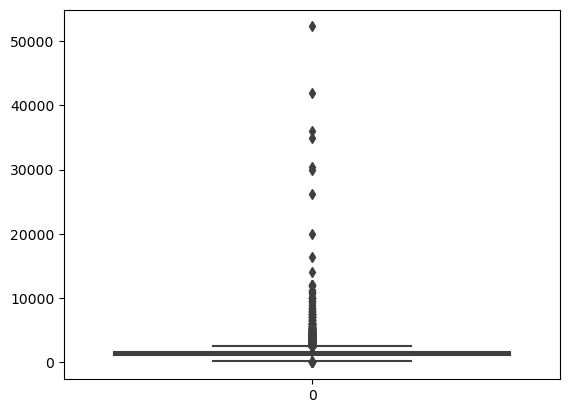

In [498]:
sns.boxplot(df['total_sqft'])

In [499]:
iqrSqt = 1656.000000 - 1100.000000
iqrSqt

556.0

In [500]:
upperSqt = 1656.000000 + 1.5 * iqrSqt
lowSqt = 1100.000000 - 1.5 * iqrSqt

In [501]:
df['total_sqft'] = np.where(
    df['total_sqft'] > upperSqt,
    upperSqt,
    df['total_sqft']
    )

In [502]:
df['total_sqft'] = np.where(
    df['total_sqft'] < lowSqt,
    lowSqt,
    df['total_sqft']
    )

<Axes: >

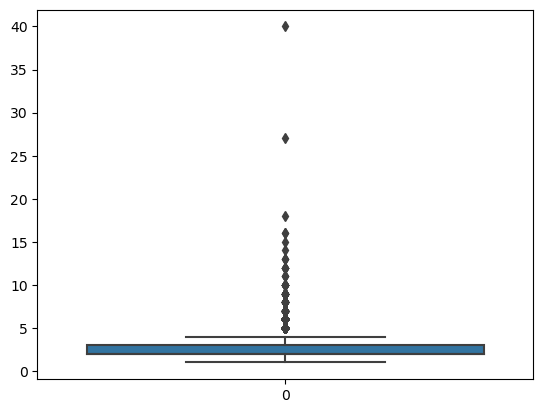

In [503]:
sns.boxplot(df['bath'])

In [504]:
iqrBath = 3 - 2 

In [505]:
upperBath = 3 + 1.5 * iqrBath

In [506]:
df['bath'] = np.where(
    df['bath'] > upperBath,
    upperBath,
    df['bath']
    )

<Axes: >

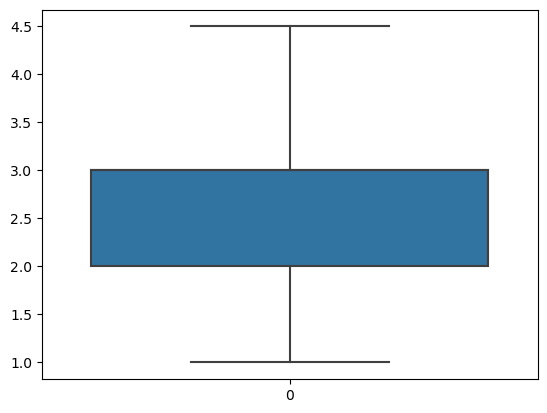

In [523]:
sns.boxplot(df['numOfRoom'])

In [508]:
iqrRoom= 3 - 2 

In [509]:
upperRoom = 3 + 1.5 * iqrRoom

In [510]:
df['numOfRoom'] = np.where(
    df['numOfRoom'] > upperBath,
    upperBath,
    df['numOfRoom']
    )

<Axes: >

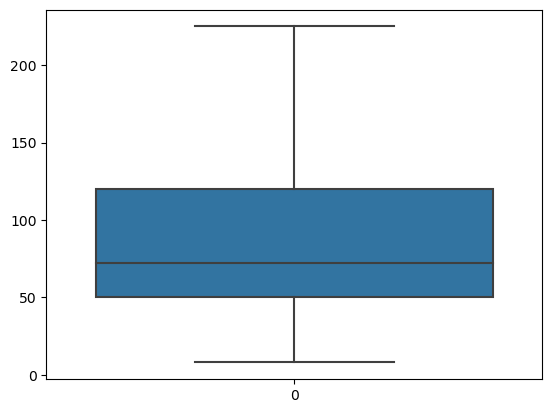

In [515]:
sns.boxplot(df['price'])

In [512]:
iqrPrice = 120 - 50

In [513]:
uppPrice = 120 + 1.5 * iqrPrice

In [514]:
df['price'] = np.where(
    df['price'] > uppPrice,
    uppPrice,
    df['price']
    )

In [516]:
reg = linear_model.LinearRegression()

In [517]:
from sklearn.model_selection import train_test_split

In [518]:
X_train, X_test,y_train, y_test = train_test_split(df[['total_sqft', 'bath', 'balcony','numOfRoom','area']],df.price ,random_state=104,test_size=0.15,shuffle=True)

In [519]:
X_train['total_sqft'] = X_train['total_sqft'] /  52272.000000
X_train['bath'] = X_train['bath'] /  40.000000
X_train['balcony'] = X_train['balcony'] /  3.000000
X_train['numOfRoom'] = X_train['numOfRoom'] /  9.000000
# X_train['locationNum'] = X_train['locationNum'] /  1306.000000
X_train['area'] = X_train['area'] /  4.000000



X_test['total_sqft'] = X_test['total_sqft'] /  52272.000000
X_test['bath'] = X_test['bath'] /  40.000000
X_test['balcony'] = X_test['balcony'] /  3.000000
X_test['numOfRoom'] = X_test['numOfRoom'] /  9.000000
# X_test['locationNum'] = X_test['locationNum'] /  1306.000000
X_test['area'] = X_test['area'] /  4.000000

y_train = y_train/3600.000000
y_test = y_test/3600.000000

In [520]:
reg =  linear_model.LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [521]:
reg.coef_

array([ 0.83026153,  0.23732798, -0.00348331,  0.01560729,  0.00340584])

In [522]:
reg.score(X_test,y_test)

0.6493083199062974